In [1]:
import pandas as pd
df=pd.read_csv('athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
df.drop(['ID'],axis=1,inplace=True)
df.shape

(271116, 14)

In [7]:
df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Medal Analysis (Medal Distribution by Country)

In [8]:
# Filter out rows without a medal
df_medals = df.dropna(subset=['Medal'])

# Group by country and count the number of medals
medals_by_country = df_medals.groupby('Team')['Medal'].count().sort_values(ascending=False)

print("Medal Distribution by Country:")
print(medals_by_country.head(10))  # Display top 10 countries


Medal Distribution by Country:
Team
United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Italy            1527
Sweden           1434
Australia        1306
Canada           1243
Hungary          1127
Name: Medal, dtype: int64


Medal Distribution by Gender

In [9]:
# Group by gender and count the number of medals
medals_by_gender = df_medals.groupby('Sex')['Medal'].count()

print("\nMedal Distribution by Gender:")
print(medals_by_gender)

# Optional: Group by both gender and country to see more detailed distribution
medals_by_gender_country = df_medals.groupby(['Team', 'Sex'])['Medal'].count().unstack().fillna(0)

print("\nMedal Distribution by Gender and Country:")
print(medals_by_gender_country.head(10))  # Display top 10 countries


Medal Distribution by Gender:
Sex
F    11253
M    28530
Name: Medal, dtype: int64

Medal Distribution by Gender and Country:
Sex                             F     M
Team                                   
A North American Team         0.0   4.0
Afghanistan                   0.0   2.0
Algeria                       3.0  14.0
Ali-Baba II                   0.0   5.0
Amateur Athletic Association  0.0   5.0
Amstel Amsterdam              0.0   4.0
Ancora                        1.0   3.0
Angelita                      0.0  12.0
Antwerpia V                   0.0   5.0
Aphrodite                     0.0   3.0


Medal Trends Over Time


Medal Trends Over Time:
Team  A North American Team  Afghanistan  Algeria  Ali-Baba II  \
Year                                                             
1896                    0.0          0.0      0.0          0.0   
1900                    4.0          0.0      0.0          0.0   
1904                    0.0          0.0      0.0          0.0   
1906                    0.0          0.0      0.0          0.0   
1908                    0.0          0.0      0.0          0.0   
1912                    0.0          0.0      0.0          0.0   
1920                    0.0          0.0      0.0          0.0   
1924                    0.0          0.0      0.0          0.0   
1928                    0.0          0.0      0.0          0.0   
1932                    0.0          0.0      0.0          0.0   

Team  Amateur Athletic Association  Amstel Amsterdam  Ancora  Angelita  \
Year                                                                     
1896                           0.0

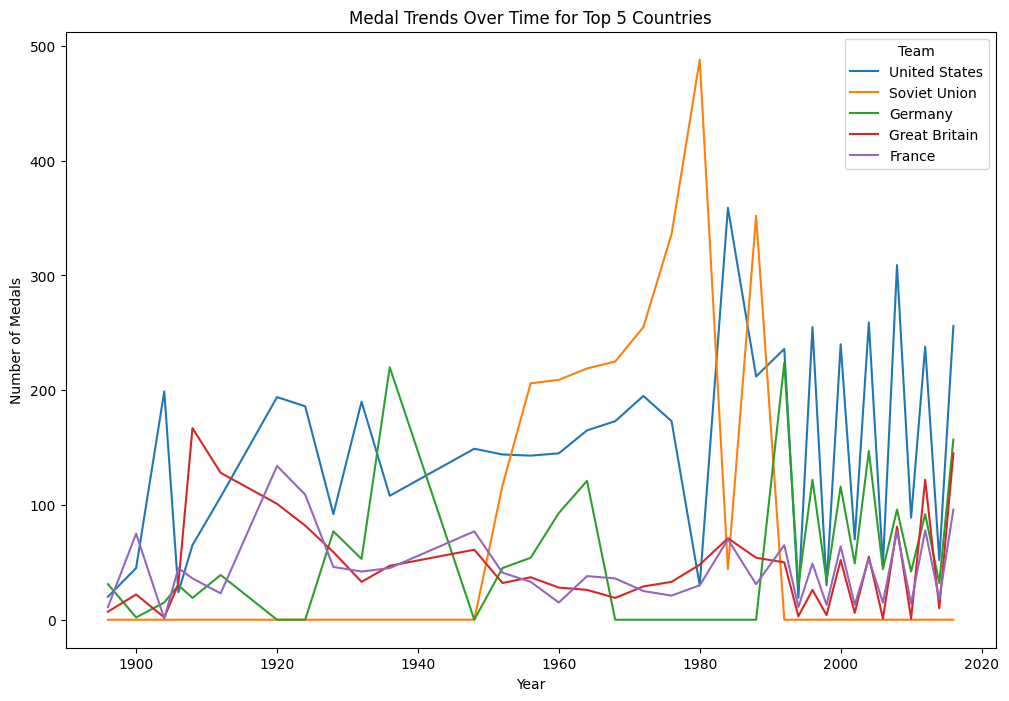

In [10]:
# Group by year and country to count the number of medals
medals_over_time = df_medals.groupby(['Year', 'Team'])['Medal'].count().unstack().fillna(0)

print("\nMedal Trends Over Time:")
print(medals_over_time.head(10))  # Display first 10 rows

# Optional: Plotting the medal trends over time for top countries
import matplotlib.pyplot as plt

top_countries = medals_by_country.head(5).index  # Select top 5 countries
medals_over_time[top_countries].plot(kind='line', figsize=(12, 8))
plt.title('Medal Trends Over Time for Top 5 Countries')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.show()


Age Distribution

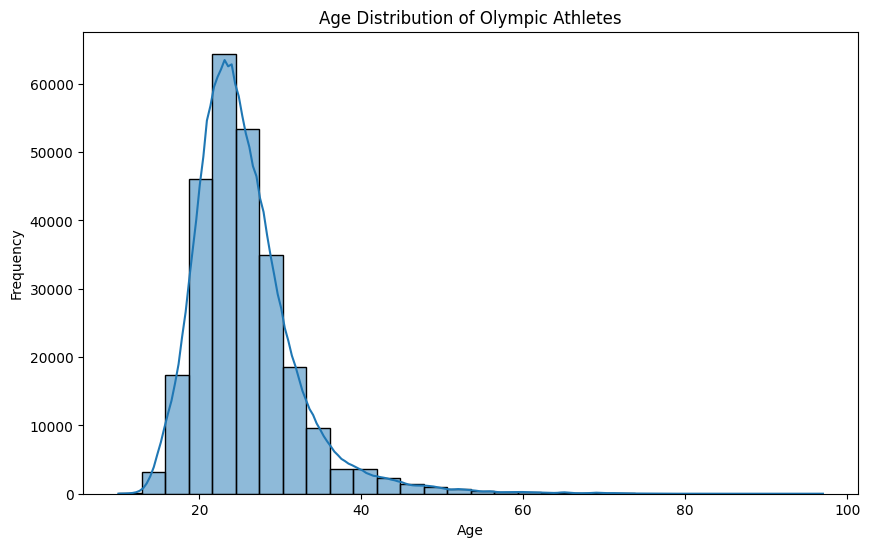

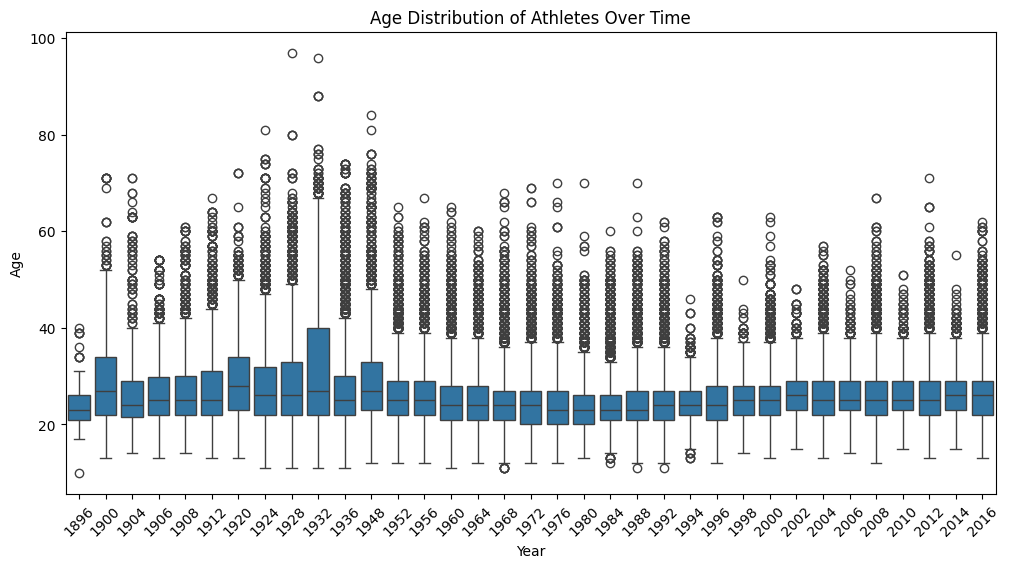

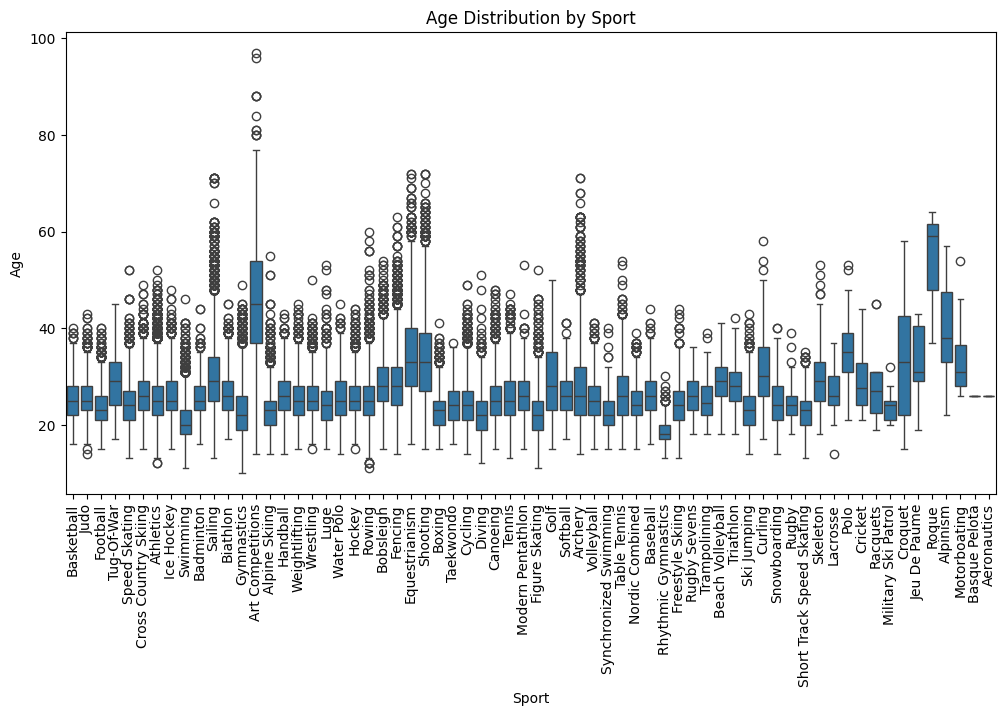

In [12]:

import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows where Age is NaN
df_age = df.dropna(subset=['Age'])

# Plot the overall age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_age['Age'], bins=30, kde=True)
plt.title('Age Distribution of Olympic Athletes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Age distribution over time
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Age', data=df_age)
plt.title('Age Distribution of Athletes Over Time')
plt.xlabel('Year')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

# Age distribution by sport
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sport', y='Age', data=df_age)
plt.title('Age Distribution by Sport')
plt.xlabel('Sport')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()


Height and Weight Analysis


Average Height and Weight by Sport:
                      Height     Weight
Sport                                  
Basketball        191.208980  85.782585
Volleyball        186.978944  78.900214
Beach Volleyball  186.202602  79.089219
Water Polo        185.028267  84.566446
Rowing            184.262638  80.168142
Handball          183.411094  81.497151
Tug-Of-War        182.727273  91.636364
Baseball          182.599291  85.718085
Bobsleigh         181.604261  89.153445
Motorboating      181.000000  77.000000


<ipython-input-13-224922dd335f>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Height', data=df_hw, ci=None)


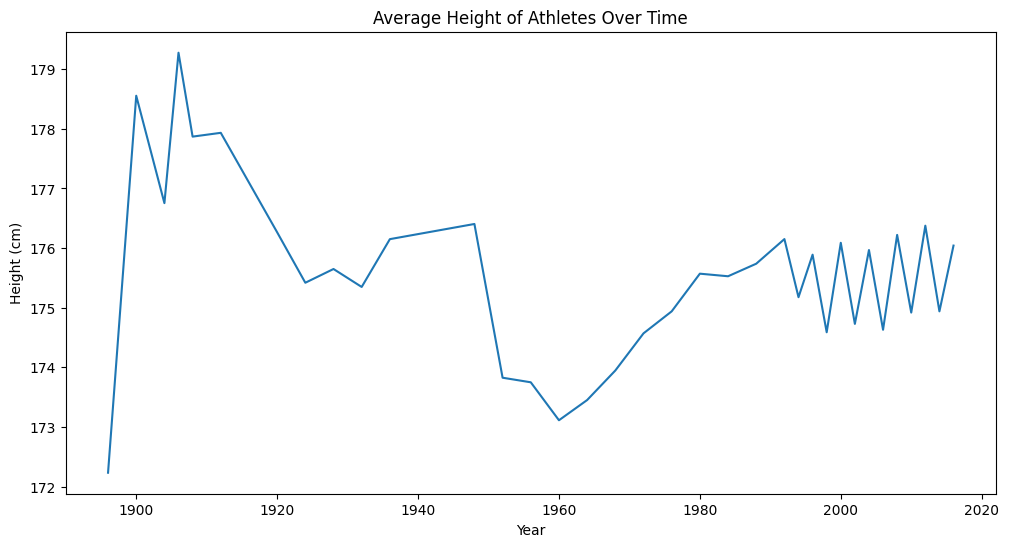

<ipython-input-13-224922dd335f>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Weight', data=df_hw, ci=None)


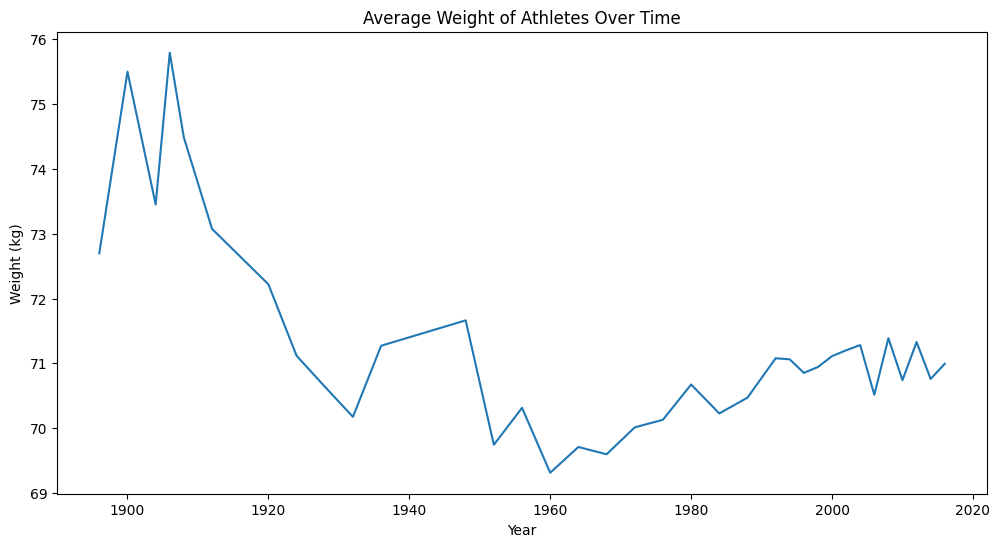

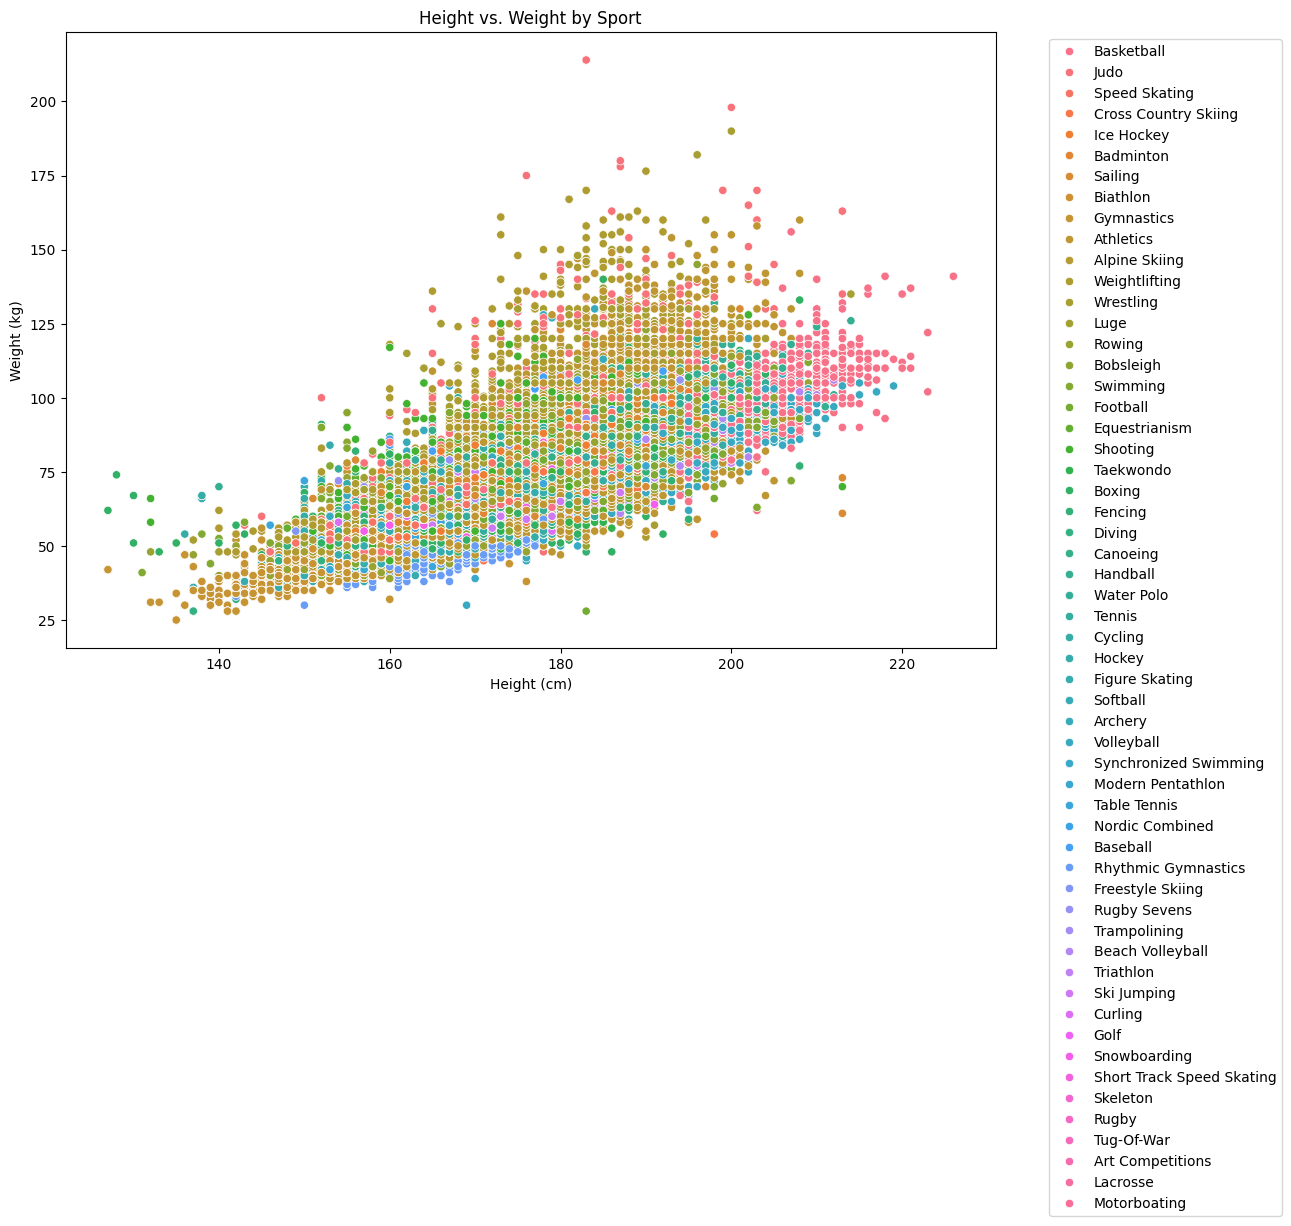

In [13]:
# Drop rows where Height or Weight is NaN
df_hw = df.dropna(subset=['Height', 'Weight'])

# Average height and weight by sport
avg_hw_by_sport = df_hw.groupby('Sport')[['Height', 'Weight']].mean().sort_values(by='Height', ascending=False)

print("\nAverage Height and Weight by Sport:")
print(avg_hw_by_sport.head(10))  # Display top 10 sports by average height

# Plot the average height and weight over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Height', data=df_hw, ci=None)
plt.title('Average Height of Athletes Over Time')
plt.xlabel('Year')
plt.ylabel('Height (cm)')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Weight', data=df_hw, ci=None)
plt.title('Average Weight of Athletes Over Time')
plt.xlabel('Year')
plt.ylabel('Weight (kg)')
plt.show()

# Height vs. Weight by sport
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Height', y='Weight', hue='Sport', data=df_hw)
plt.title('Height vs. Weight by Sport')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Gender Participation


Gender Participation Over Time:
Sex        F       M
Year                
1998  1384.0  2221.0
2000  5431.0  8390.0
2002  1582.0  2527.0
2004  5546.0  7897.0
2006  1757.0  2625.0
2008  5816.0  7786.0
2010  1847.0  2555.0
2012  5815.0  7105.0
2014  2023.0  2868.0
2016  6223.0  7465.0


<Figure size 1200x600 with 0 Axes>

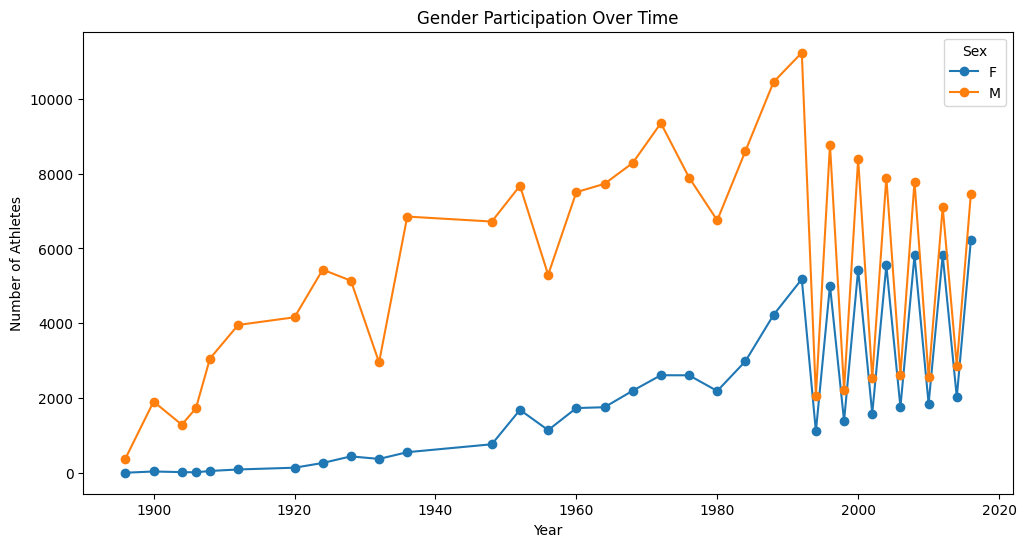


Gender Participation by Sport:
Sex                         F        M
Sport                                 
Athletics             11666.0  26958.0
Gymnastics             9129.0  17578.0
Swimming               9850.0  13345.0
Shooting               1724.0   9724.0
Cycling                1394.0   9465.0
Fencing                2000.0   8735.0
Rowing                 2193.0   8402.0
Wrestling               304.0   6850.0
Boxing                   72.0   5975.0
Cross Country Skiing   3385.0   5748.0


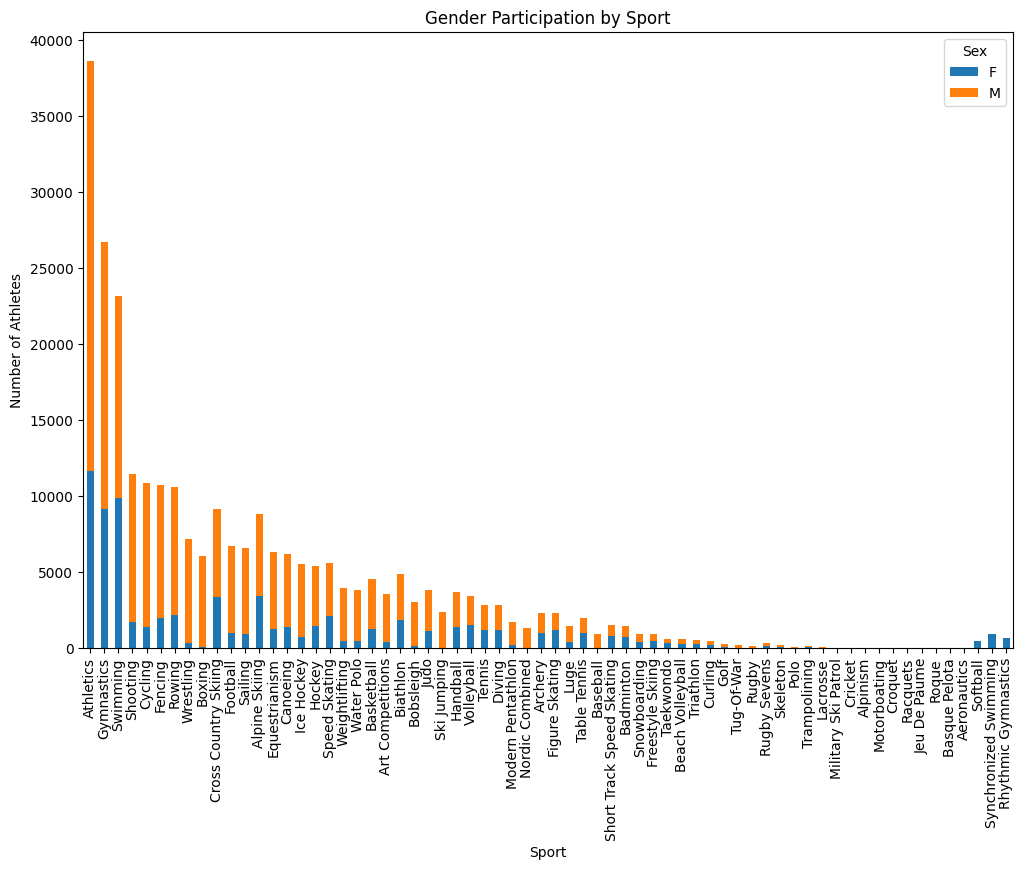

In [14]:
# Gender participation over time
gender_participation = df.groupby(['Year', 'Sex'])['Name'].count().unstack().fillna(0)

print("\nGender Participation Over Time:")
print(gender_participation.tail(10))  # Display last 10 years

# Plot gender participation over time
plt.figure(figsize=(12, 6))
gender_participation.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Gender Participation Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.show()

# Gender participation by sport
gender_sport = df.groupby(['Sport', 'Sex'])['Name'].count().unstack().fillna(0).sort_values(by='M', ascending=False)

print("\nGender Participation by Sport:")
print(gender_sport.head(10))  # Display top 10 sports by male participation

# Plot gender participation by sport
gender_sport.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Gender Participation by Sport')
plt.xlabel('Sport')
plt.ylabel('Number of Athletes')
plt.legend(title='Sex', loc='upper right')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')